# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [148]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,413,88,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
1,470,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194
2,425,89,36,69,142,57,7,135,50,18,126,154,266,128,66,3,36,193,203
3,650,98,55,104,213,67,9,206,32,23,167,223,629,220,72,5,19,187,196
4,169,98,38,70,125,52,8,130,53,18,139,157,243,132,74,0,13,186,185
5,84,89,40,76,188,76,7,150,44,19,136,174,342,148,72,3,8,193,197
6,475,97,55,104,219,71,9,211,32,24,171,222,658,223,74,1,24,186,196
7,757,91,43,72,142,56,7,149,45,19,140,168,327,165,72,13,23,186,191
8,465,82,43,71,154,68,7,150,45,19,143,171,330,173,78,7,11,181,186
9,802,89,44,80,191,66,6,162,40,20,143,189,396,180,66,13,11,194,199


Methods `describe` and `info` deliver some useful information.

In [149]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,410.475410,93.533698,44.941712,81.821494,168.983607,61.826958,8.488160,168.621129,40.998179,20.581056,148.076503,188.295082,438.870674,175.191257,72.540984,6.431694,12.408015,188.846995,195.519126
std,244.892248,8.302957,6.192492,16.009492,33.810519,7.773547,4.586789,33.320912,7.865544,2.593381,14.530661,31.633571,176.579658,32.189985,7.484574,5.075469,8.906100,6.251007,7.463665
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,194.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,151.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,404.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,625.000000,99.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,840.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,261.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [150]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [151]:
### YOUR CODE HERE
#changing string labels of the target in to int
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(target)
classes_num = len(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# searching for optimal C and penalty for logistic regression with gridsearchcv function
def find_optimal_logreg_pipeline(X_train, y_train, mx_iter = 50):
    logreg_pipe = Pipeline(steps =[('scaler',StandardScaler()),('logreg', LogisticRegression(multi_class='multinomial',solver='saga',tol=1e-3,max_iter=mx_iter))])
    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    logreg_parameters = dict(logreg__C=C,logreg__penalty=penalty)
    clf_logreg = GridSearchCV(logreg_pipe, logreg_parameters)
    clf_logreg.fit(X_train, y_train)
    print('Best Penalty:', clf_logreg.best_estimator_.get_params()['logreg__penalty'])
    print('Best C:', clf_logreg.best_estimator_.get_params()['logreg__C'])
    print(); print(clf_logreg.best_estimator_.get_params()['logreg'])
    return  Pipeline(steps =[('scaler',StandardScaler()),('logreg',clf_logreg.best_estimator_.get_params()['logreg'])])



In [ ]:
opt_logreg_pipe = find_optimal_logreg_pipeline(X_train, y_train, 500)

Best Penalty: l1
Best C: 5.428675439323859

LogisticRegression(C=5.428675439323859, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)


[]

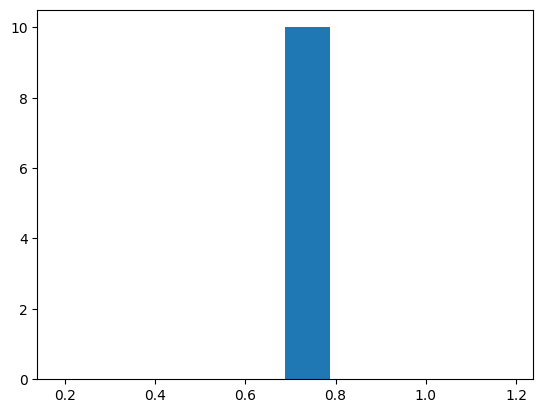

In [153]:
# Estimating model quality with accuracy
def accuracy_logreg_experiment(X,y, pipe):
  return cross_val_score(pipe['logreg'], X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

accuracy_logreg_results = [accuracy_logreg_experiment(X_train, y_train, opt_logreg_pipe) for _ in range(10)]
plt.hist(accuracy_logreg_results, bins=10)
plt.plot()

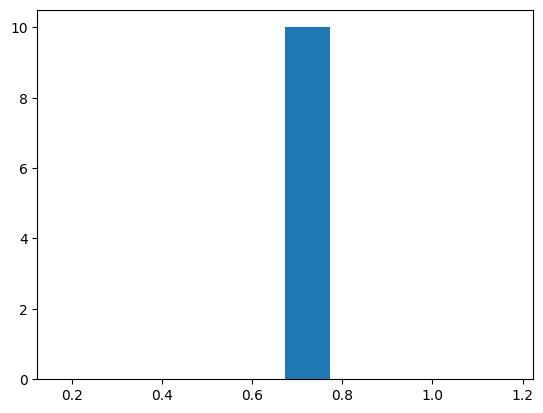

In [154]:
# Estimating model quality with f1-score
def f1_logreg_experiment(X, y, pipe):
  return cross_val_score(pipe['logreg'], X, y, scoring='f1_weighted', cv=10, n_jobs=-1).mean()
  
f1_logreg_results = [f1_logreg_experiment(X_train, y_train, opt_logreg_pipe) for _ in range(10)]
plt.hist(f1_logreg_results, bins=10);

In [155]:
#Plotting roc-auc curve for training data set and testing data
import scikitplot

def plot_roc_curve(Pipeline):
    trained_pipe = Pipeline.fit(X_train, y_train)
    y_probas = trained_pipe.predict_proba(X_train)
    scikitplot.metrics.plot_roc(y_train, y_probas)
    plt.show()
    y_probas = trained_pipe.predict_proba(X_test)
    scikitplot.metrics.plot_roc(y_test, y_probas)
    plt.show()

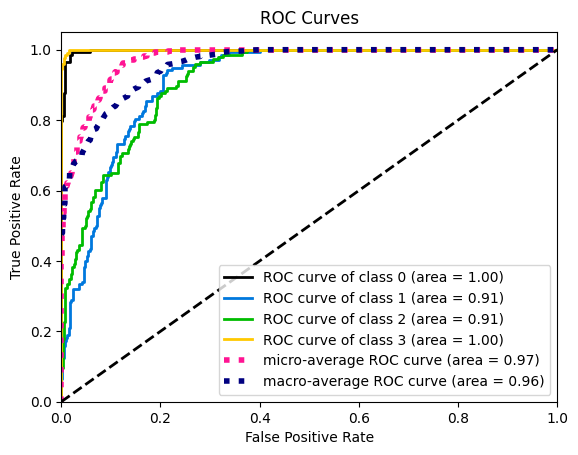

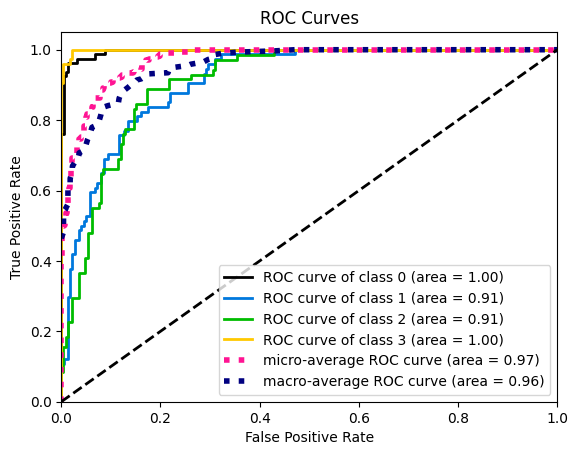

In [157]:
plot_roc_curve(opt_logreg_pipe)

In [46]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

(549, 19)
(549, 19)


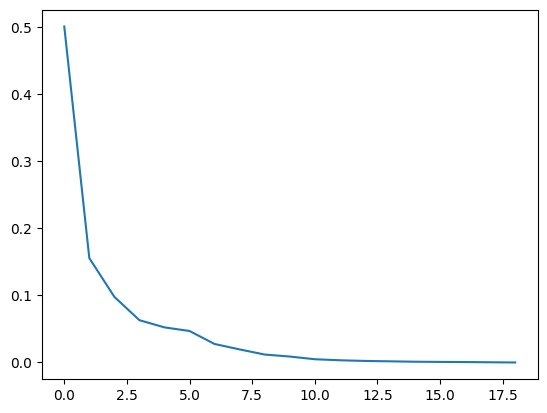

In [214]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pipe = Pipeline(steps = [('scaler', StandardScaler()),('pca', PCA())])
X_train_pca = pipe.fit_transform(X_train)
print(X_train.shape)
print(X_train_pca.shape)
plt.plot(pipe['pca'].explained_variance_ratio_)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [223]:
### YOUR CODE HERE
pipe = Pipeline(steps = [('scaler', StandardScaler()),('pca', PCA())])
#let's choose 7 as the big part of variance is focused on the first 7 components
X_train_pca = pipe.fit_transform(X_train)[:,:7]
X_test_pca = pipe.fit_transform(X_test)[:,:7]
print(X_train_pca.shape)
print(X_test_pca.shape)

(549, 7)
(297, 7)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Penalty: l1
Best C: 7.9060432109076855

LogisticRegression(C=7.9060432109076855, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)


[]

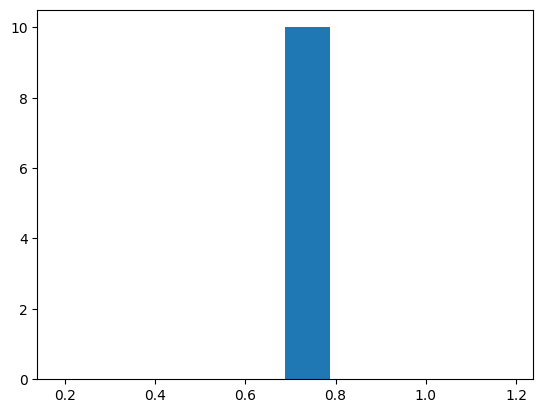

In [218]:
### YOUR CODE HERE
opt_pca_logreg_pipe = find_optimal_logreg_pipeline(X_train_pca, y_train, mx_iter = 500)
accuracy_logreg_results = [accuracy_logreg_experiment(X_train, y_train, opt_pca_logreg_pipe) for _ in range(10)]
plt.hist(accuracy_logreg_results, bins=10)
plt.plot()

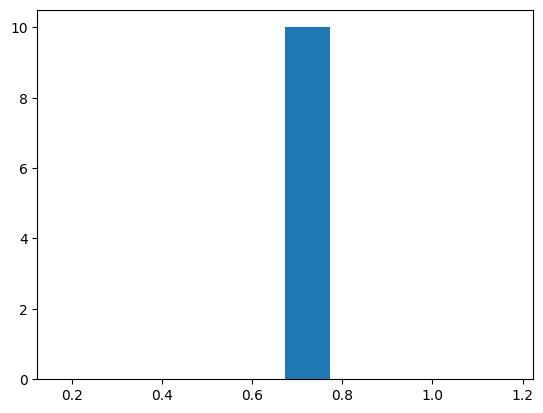

In [219]:
def f1_logreg_experiment(X, y, pipe):
  return cross_val_score(pipe['logreg'], X, y, scoring='f1_weighted', cv=10, n_jobs=-1).mean()
  
f1_logreg_results = [f1_logreg_experiment(X_train, y_train, opt_logreg_pipe) for _ in range(10)]
plt.hist(f1_logreg_results, bins=10);

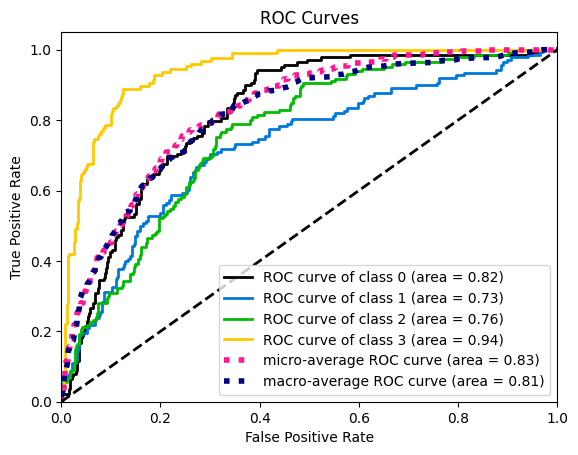

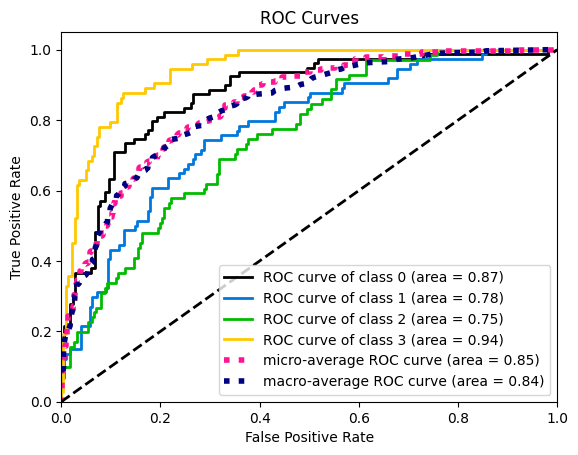

In [224]:
trained_pipe = opt_pca_logreg_pipe.fit(X_train_pca, y_train)
y_probas = trained_pipe.predict_proba(X_train_pca)
scikitplot.metrics.plot_roc(y_train, y_probas)
plt.show()
y_probas = trained_pipe.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc(y_test, y_probas)
plt.show()

*Conclusion* Quality fell -  but it works faster and using less resourses to learn 

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [164]:
from sklearn.tree import DecisionTreeClassifier
def find_optimal_decisiontree_pipeline(X_train, y_train):
    decisiontree_pipe = Pipeline(steps =[('decisiontree', DecisionTreeClassifier(random_state=0))])
    #estimating max_depth
    max_depth = [i for i in range(1, 10)]
    parameters = dict(decisiontree__max_depth=max_depth)
    clf_GS = GridSearchCV(decisiontree_pipe, parameters)
    clf_GS.fit(X_train, y_train)
    print('Best max depth:', clf_GS.best_estimator_.get_params()['decisiontree__max_depth'])
    print(); print(clf_GS.best_estimator_.get_params()['decisiontree'])
    return  Pipeline(steps=[('decisiontree',clf_GS.best_estimator_.get_params()['decisiontree'])])

Best max depth: 9

DecisionTreeClassifier(max_depth=9, random_state=0)


[]

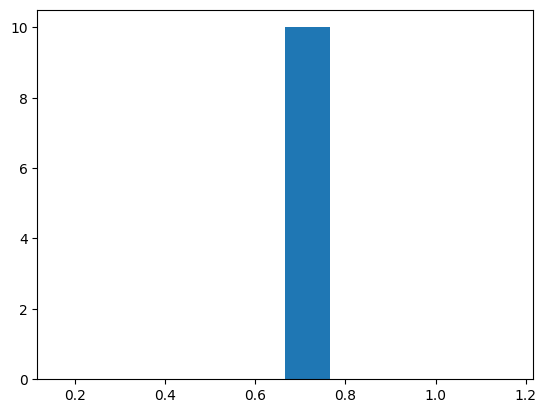

In [160]:
opt_decisiontree_pipe = find_optimal_decisiontree_pipeline(X_train , y_train)

# Estimating model quality with accuracy
def accuracy_decisiontree_experiment(X,y, pipe):
  return cross_val_score(pipe['decisiontree'], X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

accuracy_decisiontree_results = [accuracy_decisiontree_experiment(X_train, y_train, opt_decisiontree_pipe) for _ in range(10)]
plt.hist(accuracy_decisiontree_results, bins=10)
plt.plot()

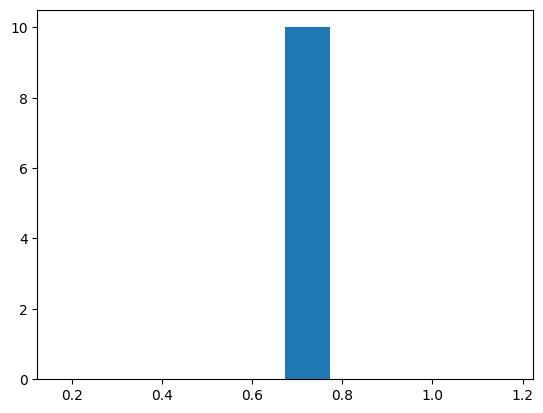

In [161]:
# Estimating model quality with f1-score
def f1_decisiontree_experiment(X, y, pipe):
  return cross_val_score(pipe['decisiontree'], X, y, scoring='f1_weighted', cv=10, n_jobs=-1).mean()
  
f1_decisiontree_results = [f1_decisiontree_experiment(X_train, y_train, opt_decisiontree_pipe) for _ in range(10)]
plt.hist(f1_logreg_results, bins=10);

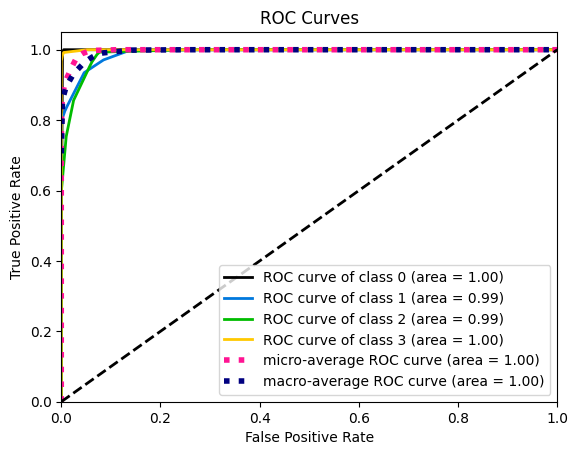

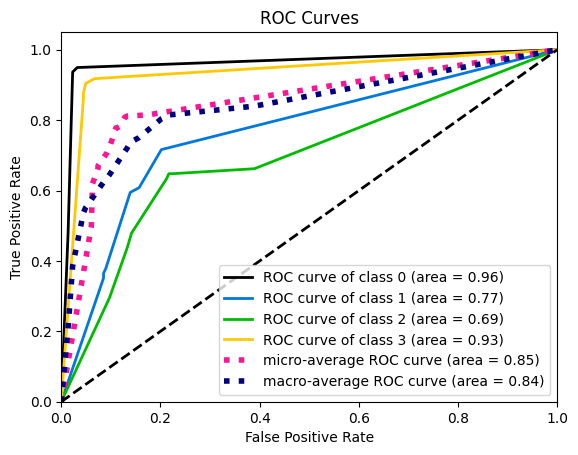

In [162]:
#Plotting roc-auc curve for training data set and testing data
plot_roc_curve(opt_decisiontree_pipe)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [181]:
# YOUR CODE HERE
import random
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

N_min = 2
#N_max decreased for appropriate model estimation time
N_max = 100
#preprocessing generation of N logreg models
logreg_pipelines = []
decisiontree_pipelines = []
for i in range(N_max):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    #max_iter is decreased for appropriate model estimation time
    logreg = find_optimal_logreg_pipeline(X_bs, y_bs)
    logreg.fit(X_bs, y_bs)
    logreg_pipelines.append(logreg)
    decisiontree = find_optimal_decisiontree_pipeline(X_bs, y_bs)
    decisiontree.fit(X_bs, y_bs)
    decisiontree_pipelines.append(decisiontree)



Best Penalty: l1
Best C: 51.79474679231202

LogisticRegression(C=51.79474679231202, max_iter=50, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)
Best max depth: 9

DecisionTreeClassifier(max_depth=9, random_state=0)
Best Penalty: l2
Best C: 0.18420699693267145

LogisticRegression(C=0.18420699693267145, max_iter=50,
                   multi_class='multinomial', solver='saga', tol=0.001)
Best max depth: 8

DecisionTreeClassifier(max_depth=8, random_state=0)
Best Penalty: l1
Best C: 1.7575106248547894

LogisticRegression(C=1.7575106248547894, max_iter=50, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)
Best max depth: 9

DecisionTreeClassifier(max_depth=9, random_state=0)
Best Penalty: l2
Best C: 51.79474679231202

LogisticRegression(C=51.79474679231202, max_iter=50, multi_class='multinomial',
                   solver='saga', tol=0.001)
Best max depth: 8

DecisionTreeClassifier(max_depth=8, random_state=0)
Best P

In [182]:
# function for plotting ensembel metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def predict_metrics(X, y, N : int, pipelines, classes_num :int ):
  accuracy_results  =  []
  f1_results = []
  res_proba = np.array([[0.0] * classes_num for i in range(X.shape[0])])
  for i in range(N):
    res_proba += np.array(pipelines[i].predict_proba(X))
    average_proba = res_proba / (i + 1)
    y_pred = np.argmax(average_proba, axis=-1)
    accuracy_results.append(accuracy_score(y, y_pred))
    f1_results.append(f1_score(y, y_pred, average="weighted"))

  X_N = [i for i in range(0,N)]
  plt.plot(X_N,  accuracy_results)
  plt.show()
  plt.plot(X_N,  f1_results)
  plt.show()

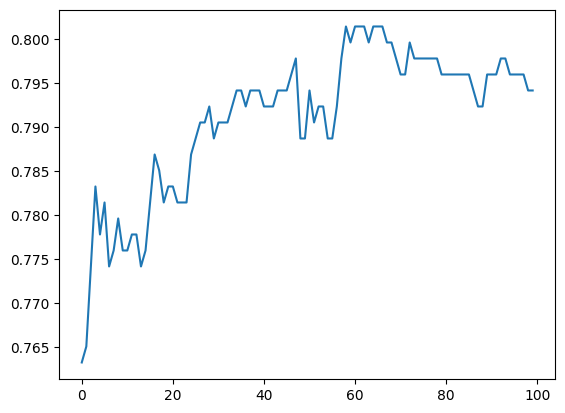

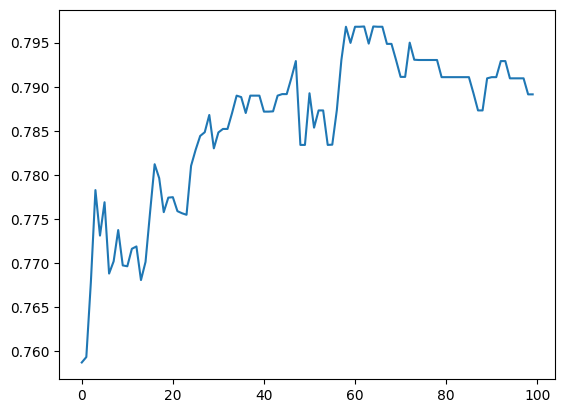

In [183]:
# metrics for logistic regression ensembel on train dataset
predict_metrics(X_train, y_train, len(logreg_pipelines), logreg_pipelines, classes_num)

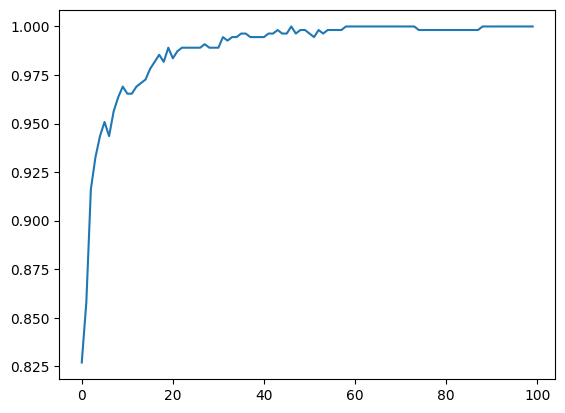

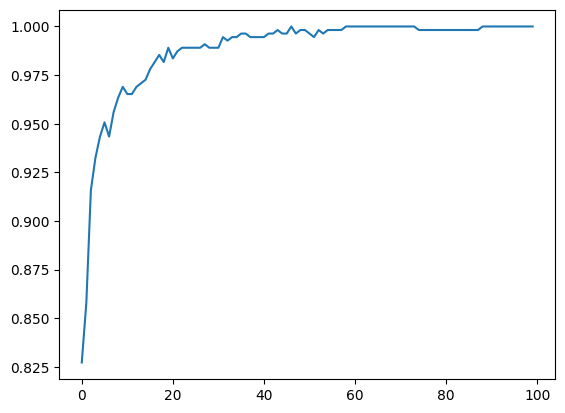

In [184]:
# metrics for decision trees ensembel on train dataset
predict_metrics(X_train, y_train, len(decisiontree_pipelines), decisiontree_pipelines, classes_num)

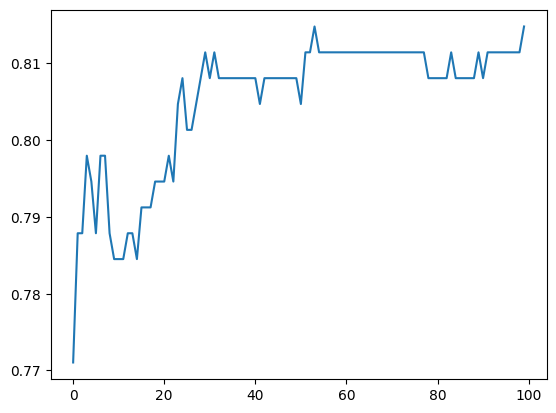

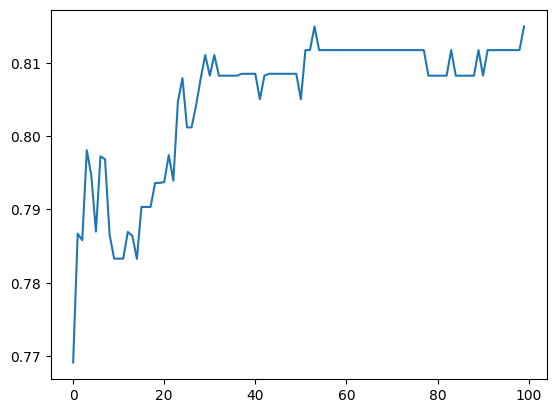

In [185]:
# metrics for logistic regression ensembel on test dataset
predict_metrics(X_test, y_test, len(logreg_pipelines), logreg_pipelines, classes_num)

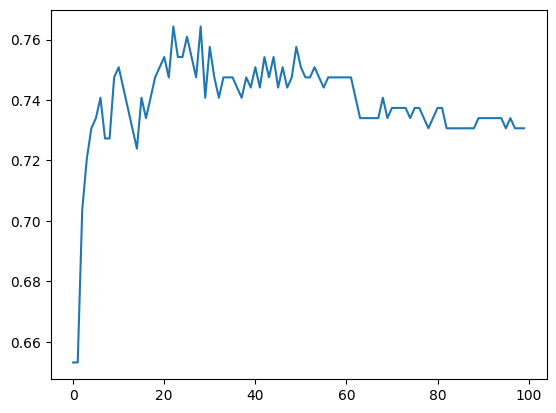

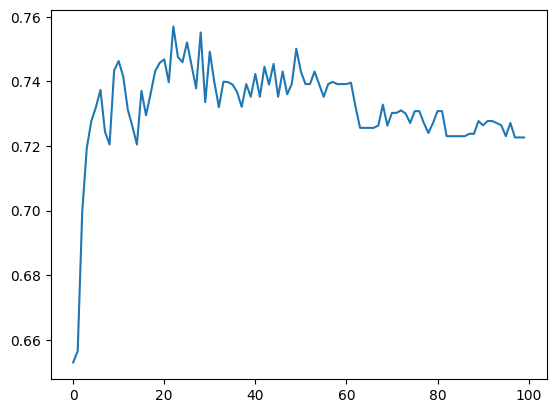

In [186]:
# metrics for decision trees ensembel on test dataset
predict_metrics(X_test, y_test, len(decisiontree_pipelines), decisiontree_pipelines, classes_num)

*Conclusion*: in the theory the more algorithms we use the less error we have (based on the lection by N times). Based on the plots, for logistic regression we have the more - the better, the decision tree is achieving maximum at somewhere nearby 20, seems like after that point retrtaining infuence too much.

Based on the logs of resampling the optimal parameters for different models are different even thought they are all based on training data, so previosly estimated optimal parameters are not valid for the models above.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [187]:
from sklearn.ensemble import RandomForestClassifier

def predict_metrics_random_forest(X, y, N : int, X_test, y_test):
  accuracy_results  =  []
  f1_results = []
  for i in range(1, N):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy_results.append(accuracy_score(y_test, y_pred))
    f1_results.append(f1_score(y_test, y_pred, average="weighted"))
    X_N = [i for i in range(1,N)]
  plt.plot(X_N,  accuracy_results)
  plt.show()
  plt.plot(X_N,  f1_results)
  plt.show()

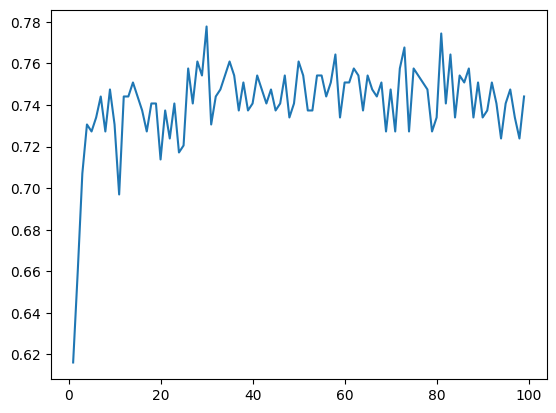

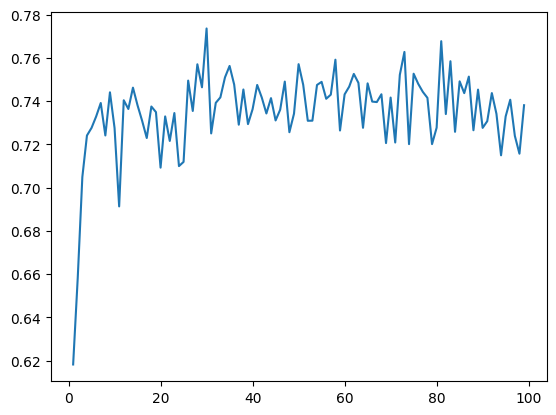

In [188]:
predict_metrics_random_forest(X_train, y_train, 100, X_test, y_test)


In [203]:

def find_optimal_randomforest_pipeline(X_train, y_train):
    randomforest_pipe = Pipeline(steps =[('randomforest', RandomForestClassifier())])
    n_estimators = [i for i in range(1,20)]
    randomforest_parameters = dict(randomforest__n_estimators=n_estimators)
    clf_randomforest = GridSearchCV(randomforest_pipe, randomforest_parameters)
    clf_randomforest.fit(X_train, y_train)
    print(); print(clf_randomforest.best_estimator_.get_params()['randomforest'])
    return  Pipeline(steps =[('randomforest',clf_randomforest.best_estimator_.get_params()['randomforest'])])

print(find_optimal_randomforest_pipeline(X_train, y_train))


RandomForestClassifier(n_estimators=15)
Pipeline(steps=[('randomforest', RandomForestClassifier(n_estimators=15))])


*Conslusion* it looks like the accuracy and f1 estimations are having values around  0.74, compared to the previous algorithms that one looks more stable. I would say that the optimal number of trees here is 5 - 7, cause this is the first time the average metrics values were achived.\
UPD: after writing estimator could say that best was 15, could not say that i was very close but pretty close

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Best Penalty: l1
Best C: 1.7575106248547894

LogisticRegression(C=1.7575106248547894, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)
Best max depth: 5

DecisionTreeClassifier(max_depth=5, random_state=0)

RandomForestClassifier(n_estimators=7)
Best Penalty: l2
Best C: 5.428675439323859

LogisticRegression(C=5.428675439323859, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)
Best max depth: 3

DecisionTreeClassifier(max_depth=3, random_state=0)

RandomForestClassifier(n_estimators=13)
Best Penalty: l1
Best C: 16.768329368110066

LogisticRegression(C=16.768329368110066, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)
Best max depth: 4

DecisionTreeClassifier(max_depth=4, random_state=0)

RandomForestClassifier(n_estimators=18)
Best Penalty: l1
Best C: 1.2067926406393288

LogisticRegression(C=1.2067926406393288,

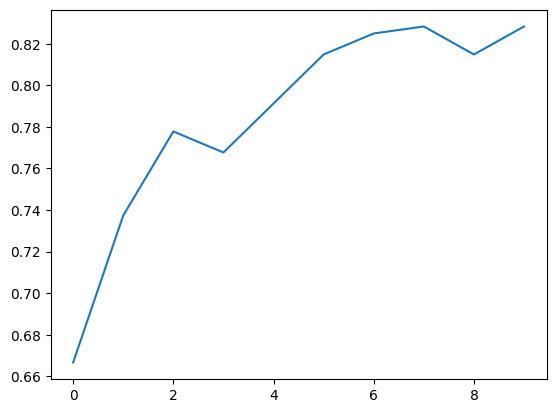

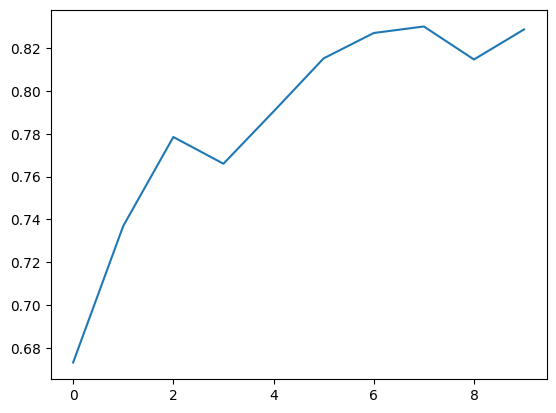

 accracy and f1 score of decisiontree model


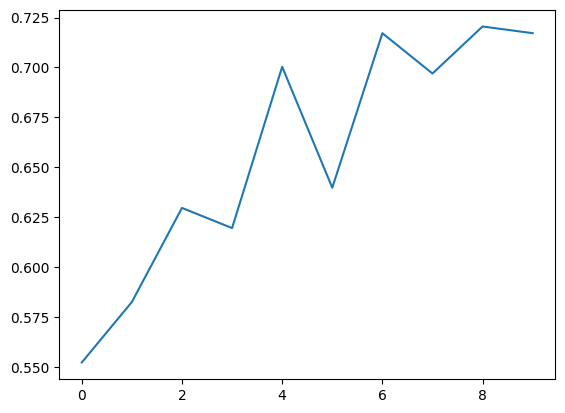

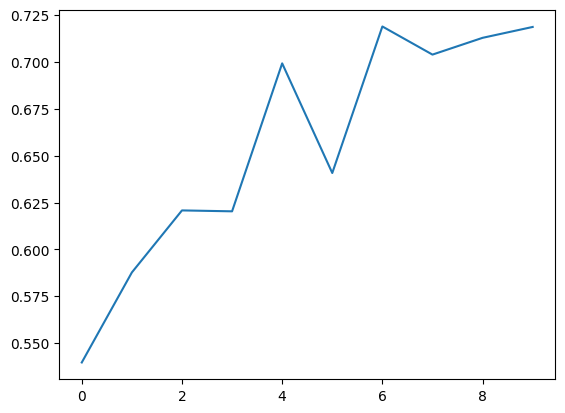

 accracy and f1 score of randomforest model


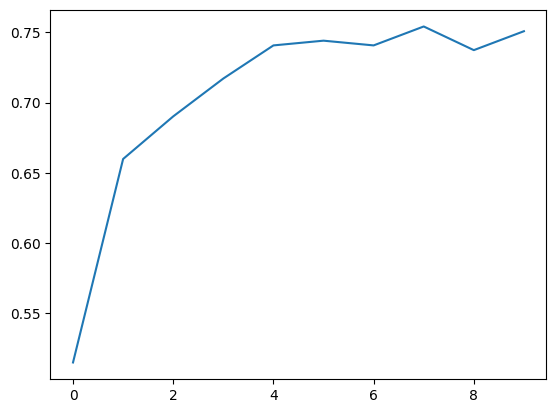

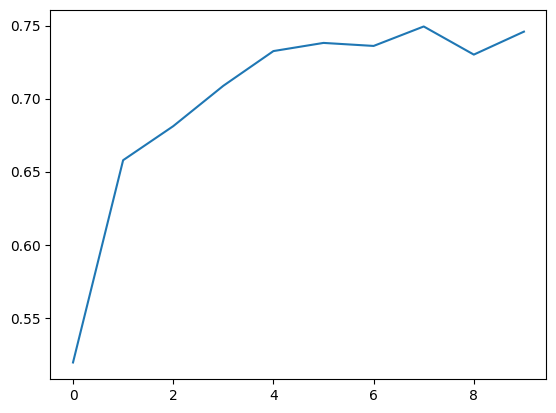

In [209]:
from collections import defaultdict

split_size = X_train.shape[0]//10
models_list = [('logreg',[]), ('decisiontree',[]),('randomforest',[])]
accuracy_results = defaultdict(list)
f1_results = defaultdict(list)

for i in range(10):
    training_data = X_train[:(i+1) * split_size]
    training_target = y_train[:(i+1) * split_size]
    logreg_model = find_optimal_logreg_pipeline(training_data, training_target, 500)
    decisiontree_model = find_optimal_decisiontree_pipeline(training_data, training_target)
    randomforest_model = find_optimal_randomforest_pipeline(training_data, training_target)
    logreg_model.fit(training_data, training_target)
    decisiontree_model.fit(training_data, training_target)
    randomforest_model.fit(training_data, training_target)
    accuracy_results['logreg'].append(accuracy_score(y_test,logreg_model.predict(X_test)))
    accuracy_results['decisiontree'].append(accuracy_score(y_test,decisiontree_model.predict(X_test)))
    accuracy_results['randomforest'].append(accuracy_score(y_test,randomforest_model.predict(X_test)))
    f1_results['logreg'].append(f1_score(y_test,logreg_model.predict(X_test), average = 'weighted'))
    f1_results['decisiontree'].append(f1_score(y_test,decisiontree_model.predict(X_test), average = 'weighted'))
    f1_results['randomforest'].append(f1_score(y_test,randomforest_model.predict(X_test), average = 'weighted'))

X_N = [i for i in range(0,10)]

for pipes in accuracy_results:
    print(f" accracy and f1 score of {pipes} model")
    plt.plot(X_N,  accuracy_results[pipes])
    plt.show()
    plt.plot(X_N,  f1_results[pipes])
    plt.show()




*Conclusion* based on the plots, more likely conclusion is like "The more data we have - the better :) "  .But this counclusion doesn't sound nice cause there is is overtraining.